Alejandro Alquezar Pitarch - University Project

## Missing Data and Normalization

First of all, I load the data and create a plot to have a visual representation of the missing data for each variable.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,SimpleImputer, IterativeImputer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [4]:
surveys = pd.read_csv("surveys.csv")

In [5]:
surveys.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


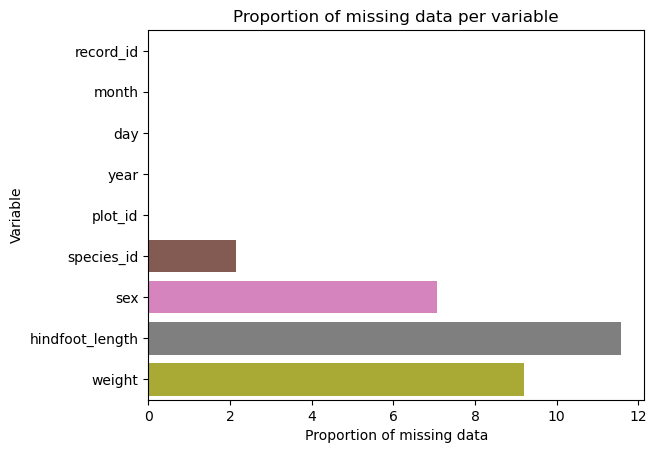

In [9]:
missing_data_count = surveys.isnull().sum()
missing_data_ratio = (missing_data_count / len(surveys)) * 100

missing_data_summary = pd.DataFrame({'variable': missing_data_count.index,
                                     'missing_data': missing_data_count.values,
                                     'missing_data_ratio': missing_data_ratio.values})

sns.barplot(x="missing_data_ratio", y = "variable", data = missing_data_summary)
plt.title("Proportion of missing data per variable")
plt.xlabel("Proportion of missing data")
plt.ylabel("Variable")
plt.show()

We take the variable 'weight' as the dependent variable and the explanatory variables 'month', 'year', 'plot_id', 'sex', and 'hindfoot_length'. Since 'sex' is not a numerical variable, which may cause problems, we replace the values of 'M' (male) with the value 0 and the values of 'F' (female) with the value 1.

In [10]:
surveys['sex'] = surveys['sex'].replace({'M': 0, 'F': 1})

data_clean = surveys.dropna(subset=['weight'])

explanatory_variables = ['month', 'year', 'plot_id', 'sex', 'hindfoot_length']
y = data_clean['weight']
X = data_clean[explanatory_variables]

print("Are there null values in the 'weight' variable?")
print(data_clean['weight'].isnull().any())

# Display the number of observations in the X and y datasets.
print("\nNumber of observations in the X dataset (explanatory variables):", X.shape[0])
print("Number of observations in the y dataset (dependent variable):", y.shape[0])

Are there null values in the 'weight' variable?
False

Number of observations in the X dataset (explanatory variables): 32283
Number of observations in the y dataset (dependent variable): 32283


### Imputation Mechanism

We start by first using simple imputation using the mean.

In [11]:
#Simple imputation using the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#Fit the linear regression model
model = LinearRegression()
model.fit(X_imputed, y)

# Predict the values of y using the fitted model
y_pred = model.predict(X_imputed)

# Calculate the coefficient of determination (R^2)
score_imp_simple_media = r2_score(y, y_pred)
print("Coefficient of determination (R^2):", score_imp_simple_media)

Coefficient of determination (R^2): 0.4334811293712356


Now, we perform simple imputation using the median.

In [12]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_imputed, y)

# Predict the values of y using the fitted model
y_pred = model.predict(X_imputed)

# Calculate the coefficient of determination (R^2)
score_imp_simple_mediana = r2_score(y, y_pred)
print("Coefficient of determination (R^2):", score_imp_simple_mediana)

Coefficient of determination (R^2): 0.4372417276222883


Next, we perform multiple imputation using chained equations (MICE).

In [14]:
imputer = IterativeImputer()
X_imputed = imputer.fit_transform(X)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_imputed, y)

# Predict the values of y using the fitted model
y_pred = model.predict(X_imputed)

# Calculate the coefficient of determination (R^2)
score_imp_multiple_simple = r2_score(y, y_pred)
print("Coefficient of determination (R^2):", score_imp_multiple_simple)

Coefficient of determination (R^2): 0.43919327531655894


I continue by using multiple imputation, this time using trees.

In [15]:
imputer = IterativeImputer(estimator=DecisionTreeRegressor(), random_state=0)
X_imputed = imputer.fit_transform(X)

# Fit the regression model using decision trees.
model = LinearRegression()
model.fit(X_imputed, y)

# Predict the values of y using the fitted model
y_pred = model.predict(X_imputed)

# Calculate the coefficient of determination (R^2)
score_imp_multiple_arbol = r2_score(y, y_pred)
print("Coefficient of determination (R^2):", score_imp_multiple_arbol)

Coefficient of determination (R^2): 0.4407960355852155


C:\Users\Alejandro\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Finally, we use multiple imputation using k-nearest neighbors (KNN).

In [16]:
imputer = KNNImputer()
X_imputed = imputer.fit_transform(X)

# Fit the regression model using decision trees.
model = LinearRegression()
model.fit(X_imputed, y)

# Predict the values of y using the fitted model
y_pred = model.predict(X_imputed)

# Calculate the coefficient of determination (R^2)
score_knn = r2_score(y, y_pred)
print("Coefficient of determination (R^2):", score_knn)

Coefficient of determination (R^2): 0.4452573283071828


And, as we can observe, it has the highest coefficient of determination with a value of 0.44525... This indicates that it is the best method for imputing missing values in this case. Another method not used in this case could be interpolation imputation.

We introduce the values of the model into our clean dataset.

In [18]:
data_clean.loc[:, 'month'] = X_imputed[:, 0]
data_clean.loc[:, 'year'] = X_imputed[:, 1]
data_clean.loc[:, 'plot_id'] = X_imputed[:, 2]
data_clean.loc[:, 'sex'] = X_imputed[:, 3]
data_clean.loc[:, 'hindfoot_length'] = X_imputed[:, 4]

In [19]:
data_clean.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,0.0,35.0,40.0
63,64,8,19,1977,7,DM,0.0,37.0,48.0
64,65,8,19,1977,4,DM,1.0,34.0,29.0
65,66,8,19,1977,4,DM,1.0,35.0,46.0
66,67,8,19,1977,7,DM,0.0,35.0,36.0


### Normalization

We begin by selecting the numerical columns that we need to normalize, which are 'weight' and 'hindfoot_length'. After obtaining the data, we normalize it using Z-score with the StandardScaler() function. Finally, we merge the data into a single dataset.

In [20]:
col_num = ['hindfoot_length', 'weight']
num_data = data_clean[col_num]

In [21]:
scaler = StandardScaler()
datos_norm = pd.DataFrame(scaler.fit_transform(num_data), columns = col_num)

In [22]:
datos_cat = data_clean.drop(columns = col_num)
datos_unificados = pd.concat([datos_cat, datos_norm], axis = 1)

In [23]:
datos_unificados

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63.0,8.0,19.0,1977.0,3.0,DM,0.0,0.373927,-0.154855
63,64.0,8.0,19.0,1977.0,7.0,DM,0.0,0.689495,-0.236753
64,65.0,8.0,19.0,1977.0,4.0,DM,1.0,0.689495,0.063542
65,66.0,8.0,19.0,1977.0,4.0,DM,1.0,-1.519483,-0.973840
66,67.0,8.0,19.0,1977.0,7.0,DM,0.0,0.794684,0.227339
...,...,...,...,...,...,...,...,...,...
32248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.467589,-0.427850
32249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.098725,-0.509748
32250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.729861,-0.946540
32251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.257210,-0.182154


The normalized values for 'hindfoot_length' and 'weight' indicate how many standard deviations the original values are from the mean of the data.

For example, a normalized value of 0.373927 for 'hindfoot_length' means that the original value was approximately 0.37 standard deviations above the mean.

A negative normalized value indicates that the original value is below the mean, while a positive value indicates that it is above the mean.

A normalized value of 0 means that the original value is equal to the mean of the normalized data.